In [ ]:
# Take customer transaction data for the dates before last start_date for capmaign_id in partialTrainData

In [1]:
import pandas as pd
import numpy as np

In [8]:
trainData = pd.read_csv('./train_AUpWtIz/train.csv')
itemData = pd.read_csv('./train_AUpWtIz/item_data.csv')
customer_transaction_data = pd.read_csv('./train_AUpWtIz/customer_transaction_data.csv')
customer_demographics = pd.read_csv('./train_AUpWtIz/customer_demographics.csv')
coupon_item_mapping = pd.read_csv('./train_AUpWtIz/coupon_item_mapping.csv')
campaign_data = pd.read_csv('./train_AUpWtIz/campaign_data.csv')

testData = pd.read_csv('test_QyjYwdj.csv')


In [3]:
trainData.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [4]:
trainData.groupby(['campaign_id']).agg({"coupon_id": pd.Series.nunique})

,coupon_id
campaign_id,
1,11
2,16
3,34
4,12
5,11
6,1
7,8
8,208
9,18


In [7]:
trainData.groupby(['campaign_id']).agg({"redemption_status": ["mean", "sum", "count"]})

redemption_status            
                         mean  sum  count
campaign_id                              
1                    0.006993    1    143
2                    0.006510    5    768
3                    0.004902    2    408
4                    0.007202    7    972
5                    0.003831    7   1827
6                    0.015385    1     65
7                    0.002525    4   1584
8                    0.008823  199  22555
9                    0.007260   23   3168
10                   0.004063    7   1723
11                   0.002157    6   2782
12                   0.004706   12   2550
13                   0.015306  346  22606
26                   0.008587   52   6056
27                   0.003086    1    324
28                   0.002101    1    476
29                   0.004108   16   3895
30                   0.006031   39   6467

In [6]:
testData.groupby(['campaign_id']).agg({"coupon_id": pd.Series.nunique})

,coupon_id
campaign_id,
16,12
17,19
18,204
19,10
20,24
21,16
22,21
23,18
24,2


In [10]:
campaign_data

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13
5,22,X,16/09/13,18/10/13
6,18,X,10/08/13,04/10/13
7,19,Y,26/08/13,27/09/13
8,17,Y,29/07/13,30/08/13
9,16,Y,15/07/13,16/08/13


In [26]:
# Check if a coupon_id performs differently for different campaign_id
trainData.groupby(['coupon_id']).agg({'campaign_id': pd.Series.nunique}).reset_index().sort_values(by=["campaign_id"])

,coupon_id,campaign_id
0,1,1
542,712,1
543,714,1
544,715,1
545,716,1
547,719,1
550,724,1
551,725,1
553,727,1
554,728,1


In [31]:
trainData[trainData['coupon_id'] == 705].groupby(["coupon_id", "campaign_id"]).agg({"redemption_status":"mean"})

redemption_status
coupon_id campaign_id                   
705       8                     0.062992
          9                     0.022727
          12                    0.005882
          13                    0.072165

In [34]:
#Analysing Campaign Data

In [36]:
campaign_data

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13
5,22,X,16/09/13,18/10/13
6,18,X,10/08/13,04/10/13
7,19,Y,26/08/13,27/09/13
8,17,Y,29/07/13,30/08/13
9,16,Y,15/07/13,16/08/13


In [ ]:
np.unique(trainData['campaign'])

In [38]:
trainCampaign = pd.merge(trainData, campaign_data, on='campaign_id', how = "left")

In [39]:
trainCampaign.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date
0,1,13,27,1053,0,X,19/05/13,05/07/13
1,2,13,116,48,0,X,19/05/13,05/07/13
2,6,9,635,205,0,Y,11/03/13,12/04/13
3,7,13,644,1050,0,X,19/05/13,05/07/13
4,9,8,1017,1489,0,X,16/02/13,05/04/13


In [40]:
trainCampaign.groupby(['campaign_type']).agg({"redemption_status":["mean"]})

,redemption_status
,mean
campaign_type,
X,0.011026
Y,0.004496


In [45]:
campaign_data['start_date'] = pd.to_datetime(campaign_data['start_date'], dayfirst=True)

In [47]:
np.unique(testData['campaign_id'])

array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [48]:

campaign_data[campaign_data['campaign_id'].isin(np.unique(testData['campaign_id']))]  #.sort_values(by=['start_date'])

,campaign_id,campaign_type,start_date,end_date
0,24,Y,2013-10-21,20/12/13
1,25,Y,2013-10-21,22/11/13
2,20,Y,2013-09-07,16/11/13
3,23,Y,2013-10-08,15/11/13
4,21,Y,2013-09-16,18/10/13
5,22,X,2013-09-16,18/10/13
6,18,X,2013-08-10,04/10/13
7,19,Y,2013-08-26,27/09/13
8,17,Y,2013-07-29,30/08/13
9,16,Y,2013-07-15,16/08/13


In [50]:
campaign_data[~campaign_data['campaign_id'].isin(np.unique(testData['campaign_id']))]

,campaign_id,campaign_type,start_date,end_date
10,13,X,2013-05-19,05/07/13
11,11,Y,2013-04-22,07/06/13
12,12,Y,2013-04-22,24/05/13
13,10,Y,2013-04-08,10/05/13
14,9,Y,2013-03-11,12/04/13
15,8,X,2013-02-16,05/04/13
16,7,Y,2013-02-02,08/03/13
17,6,Y,2013-01-28,01/03/13
18,3,Y,2012-12-22,16/02/13
19,5,Y,2013-01-12,15/02/13


In [55]:
customer_transaction_data['date'].max()

'2013-07-03'

In [ ]:
Take customer transaction data for the dates before last start_date for capmaign_id in partialTrainData[campaign_id 8 - 13]

In [56]:
customer_transaction_data['date'] = pd.to_datetime(customer_transaction_data['date'])

In [57]:
customer_transaction_data['date'].head()

0   2012-01-02
1   2012-01-02
2   2012-01-02
3   2012-01-02
4   2012-01-02
Name: date, dtype: datetime64[ns]

In [58]:
customer_transaction_data_validate = customer_transaction_data[customer_transaction_data['date'] < "2013-02-16"]

In [60]:
customer_transaction_data_validate['date'].min()

Timestamp('2012-01-02 00:00:00')

In [73]:
trainLe['campaign_id'].value_counts()

13    22606
8     22555
30     6467
26     6056
29     3895
9      3168
11     2782
12     2550
5      1827
10     1723
7      1584
4       972
2       768
28      476
3       408
27      324
1       143
6        65
Name: campaign_id, dtype: int64

In [ ]:
# For new customer data

In [102]:
mergedDataFullLe = pd.read_csv('mergedDataFullLe.csv')

In [162]:
trainLe = mergedDataFullLe.iloc[:trainData.shape[0],:]
testLe = mergedDataFullLe.iloc[trainData.shape[0]:,:]

In [636]:
mergedDataFullLe.shape, trainLe.shape, testLe.shape

((78369, 70), (78369, 70), (0, 70))

In [105]:
partialTrainData = trainLe[~trainLe['campaign_id'].isin([9,10,11,12,13])]

In [106]:
partialTrainData = trainLe[~trainLe['campaign_id'].isin([9,10,11,12,13])]
partialValidateData = trainLe[trainLe['campaign_id'].isin([9,10,11,12,13])]

In [107]:
len(np.unique(partialTrainData['campaign_id'])), len(np.unique(partialValidateData['campaign_id']))

(13, 5)

In [108]:
len(np.unique(partialTrainData['customer_id'])), len(np.unique(partialValidateData['customer_id']))

(1275, 1152)

In [109]:
len(np.unique(partialTrainData['coupon_id'])), len(np.unique(partialValidateData['coupon_id']))

(664, 262)

In [110]:
partialTrainData.shape, partialValidateData.shape

((45540, 57), (32829, 57))

In [111]:
from sklearn.metrics import roc_auc_score

In [ ]:
 0.007059 |  2.0      |  200.0    |  20.0     |  3.432e+0 |  10.0     |
    learni... | max_depth | min_da... | min_su... | n_esti... | num_le..

In [405]:
partialTrainData.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status', 'active_days_num', 'start_date_day', 'start_date_month', 'start_date_year', 'start_date_weekDay', 'start_date_week', 'end_date_day', 'end_date_month', 'end_date_year', 'end_date_weekDay', 'end_date_week', 'brand_type_Established', 'brand_type_Local', 'category_Bakery', 'category_Dairy, Juices & Snacks', 'category_Flowers & Plants', 'category_Garden', 'category_Grocery', 'category_Meat', 'category_Miscellaneous', 'category_Natural Products', 'category_Packaged Meat', 'category_Pharmaceutical', 'category_Prepared Food', 'category_Restauarant', 'category_Salads', 'category_Seafood', 'category_Skin & Hair Care', 'category_Travel', 'category_Vegetables (cut)', 'item_price', 'brand', 'coupon_item_count', 'num_categories', 'tot_item_id', 'tot_quantity', 'avg_item_price', 'tot_item_id_coupon', 'tot_quantity_coupon', 'avg_item_price_coupon', 'rented', 'income_bracket', 'marital_status_null', 'no_of_children_null', 'no_

In [413]:
for i,j in enumerate(cat_features):
    print(i,j)

0 no_of_adults
1 last_active_interval
2 customer_demographic_null
3 age_range_le
4 family_size_le
5 no_of_children_le
6 campaign_type_le
7 marital_status_le


In [421]:
partialTrainData['no_of_adults'] = partialTrainData['no_of_adults'].astype('int')
partialTrainData.head()

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,campaign_id,coupon_id,customer_id,redemption_status,active_days_num,start_date_day,start_date_month,start_date_year,start_date_weekDay,start_date_week,end_date_day,end_date_month,end_date_year,end_date_weekDay,end_date_week,brand_type_Established,brand_type_Local,category_Bakery,"category_Dairy, Juices & Snacks",category_Flowers & Plants,category_Garden,category_Grocery,category_Meat,category_Miscellaneous,category_Natural Products,category_Packaged Meat,category_Pharmaceutical,category_Prepared Food,category_Restauarant,category_Salads,category_Seafood,category_Skin & Hair Care,category_Travel,category_Vegetables (cut),item_price,brand,coupon_item_count,num_categories,tot_item_id,tot_quantity,avg_item_price,tot_item_id_coupon,tot_quantity_coupon,avg_item_price_coupon,rented,income_bracket,marital_status_null,no_of_children_null,no_of_adults,last_active_interval,customer_demographic_null,age_range_le,family_size_le,no_of_children_le,campaign_type_le,marital_status_le,active_days_num_freq,income_bracket_freq,age_range_le_freq,no_of_adults_freq,item_price_cat,bothBrandType,start_date_weekDay_freq,no_of_months_for_campaign,num_campaign_customer_id,num_campaign_coupon_id,num_campaign_rows
25774,9,8,1017,1489,0.00,48,16,2,2013,5,7,5,4,2013,4,14,32.00,0.00,0,0.00,0.00,0,32.00,0.00,0,0.00,0.00,0.00,0,0,0,0.00,0.00,0,0,201.15,1.00,32,1,124096,430,86.86,225,391,82.03,0.00,3.00,0.00,1.00,2,0,0,3,1,0,0,0,0.01,0.01,0.01,0.01,3,0,0.01,2,1076,208,22555
25775,29,8,8,695,0.00,48,16,2,2013,5,7,5,4,2013,4,14,3381.00,337.00,0,0.00,0.00,0,8.00,2029.00,15,0.00,1661.00,0.00,4,0,0,1.00,0.00,0,0,179.06,955.00,3718,6,13668,1419,120.02,860,1006,121.99,0.00,6.00,0.00,1.00,2,0,0,4,1,0,0,0,0.01,0.02,0.01,0.01,3,1,0.01,2,1076,208,22555
25776,30,8,674,886,0.00,48,16,2,2013,5,7,5,4,2013,4,14,25.00,0.00,0,0.00,0.00,0,25.00,0.00,0,0.00,0.00,0.00,0,0,0,0.00,0.00,0,0,110.90,1.00,25,1,644,526,103.34,266,308,118.76,0.00,5.00,0.00,0.00,2,0,0,3,2,1,0,0,0.01,0.01,0.01,0.01,2,0,0.01,2,1076,208,22555
25777,34,8,278,1398,0.00,48,16,2,2013,5,7,5,4,2013,4,14,27.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,27.00,0,0,0,0.00,0.00,0,0,128.95,2.00,27,1,141563,681,108.87,405,487,119.91,0.00,2.00,0.00,1.00,1,0,0,2,0,0,0,1,0.01,0.01,0.01,0.01,2,0,0.01,2,1076,208,22555
25778,43,8,911,197,0.00,48,16,2,2013,5,7,5,4,2013,4,14,31.00,0.00,0,0.00,0.00,0,0.00,0.00,0,0.00,0.00,31.00,0,0,0,0.00,0.00,0,0,152.20,1.00,31,1,134016,784,80.97,467,600,92.20,0.00,4.00,1.00,0.00,2,0,0,0,3,2,0,1,0.01,0.01,0.01,0.01,3,0,0.01,2,1076,208,22555


In [423]:
partialTrainData[['no_of_adults', 'last_active_interval', 'customer_demographic_null', 'age_range_le', 'family_size_le', 
                   'no_of_children_le', 'campaign_type_le', 'marital_status_le']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45540 entries, 25774 to 78368
Data columns (total 8 columns):
no_of_adults                 45540 non-null int32
last_active_interval         45540 non-null int64
customer_demographic_null    45540 non-null int64
age_range_le                 45540 non-null int64
family_size_le               45540 non-null int64
no_of_children_le            45540 non-null int64
campaign_type_le             45540 non-null int64
marital_status_le            45540 non-null int64
dtypes: int32(1), int64(7)
memory usage: 3.0 MB


In [434]:
partialTrainData.iloc[:,49:56].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45540 entries, 25774 to 78368
Data columns (total 7 columns):
no_of_adults                 45540 non-null int32
last_active_interval         45540 non-null int64
customer_demographic_null    45540 non-null int64
age_range_le                 45540 non-null int64
family_size_le               45540 non-null int64
no_of_children_le            45540 non-null int64
campaign_type_le             45540 non-null int64
dtypes: int32(1), int64(6)
memory usage: 2.6 MB


In [432]:
cat_features = ['no_of_adults', 'last_active_interval', 'customer_demographic_null', 'age_range_le', 'family_size_le', 
                   'no_of_children_le', 'campaign_type_le', 'marital_status_le']
a = [i for (i,j) in enumerate(partialTrainData.columns) if j in cat_features]

In [433]:
a

[49, 50, 51, 52, 53, 54, 55, 56]

In [438]:
cat_features = ['no_of_adults', 'last_active_interval', 'customer_demographic_null', 'age_range_le', 'family_size_le', 
                   'no_of_children_le', 'campaign_type_le', 'marital_status_le']

from catboost import CatBoostClassifier
from sklearn.preprocessing import RobustScaler
rbsFull = RobustScaler()
"""params = {'min_data_in_leaf': 200, 'learning_rate': 0.007059, #'metric': 'binary_logloss', "feature_fraction":0.8,
 #'subsample': 0.9920028820065904, 'bagging_freq': 11, 'importance_type': 'gain', "bagging_fraction": 0.8, "lambda": 0.1,
 'min_sum_hessian_in_leaf': 20, #'verbose': 1, 'boost_from_average': False,
 #'colsample_bytree': 0.13358144268185645, 'objective': 'binary', 
 'max_depth': 2, 'num_leaves': 10, 'verbose_eval': True}"""

params = {'learning_rate': 0.02705919212825226,
 'max_depth': 3}
ctb_clf = CatBoostClassifier(**params, n_estimators = 2000,  reg_lambda=0.1)
ctb_clf.fit((partialTrainData.drop(['redemption_status', 'id', 
                ], axis = 1)), partialTrainData['redemption_status'] , cat_features = ['no_of_adults','last_active_interval',
                'customer_demographic_null', 'age_range_le', 'family_size_le', 
                   'no_of_children_le', 'campaign_type_le', 'marital_status_le'])
# roc_auc_score()

# 'customer_id', 'campaign_id','item_price',
#                     'start_date_weekDay','active_days_num','age_range_le'
roc_auc_score(partialValidateData['redemption_status'],ctb_clf.predict_proba(
    (partialValidateData.drop(['redemption_status', 'id'],
                                               axis = 1)))[:,1])

0:	learn: 0.6296408	total: 110ms	remaining: 3m 39s
1:	learn: 0.5717424	total: 222ms	remaining: 3m 41s
2:	learn: 0.5195259	total: 328ms	remaining: 3m 38s
3:	learn: 0.4702751	total: 431ms	remaining: 3m 34s
4:	learn: 0.4264552	total: 533ms	remaining: 3m 32s
5:	learn: 0.3889027	total: 631ms	remaining: 3m 29s
6:	learn: 0.3545074	total: 730ms	remaining: 3m 27s
7:	learn: 0.3240195	total: 843ms	remaining: 3m 29s
8:	learn: 0.2967980	total: 949ms	remaining: 3m 29s
9:	learn: 0.2717946	total: 1.07s	remaining: 3m 32s
10:	learn: 0.2490992	total: 1.2s	remaining: 3m 37s
11:	learn: 0.2295623	total: 1.31s	remaining: 3m 37s
12:	learn: 0.2105095	total: 1.42s	remaining: 3m 37s
13:	learn: 0.1949378	total: 1.53s	remaining: 3m 36s
14:	learn: 0.1797488	total: 1.62s	remaining: 3m 34s
15:	learn: 0.1674155	total: 1.72s	remaining: 3m 33s
16:	learn: 0.1559133	total: 1.82s	remaining: 3m 32s
17:	learn: 0.1459422	total: 1.93s	remaining: 3m 32s
18:	learn: 0.1367435	total: 2.03s	remaining: 3m 31s
19:	learn: 0.1285786	to

158:	learn: 0.0368889	total: 16.6s	remaining: 3m 12s
159:	learn: 0.0368471	total: 16.7s	remaining: 3m 12s
160:	learn: 0.0368369	total: 16.8s	remaining: 3m 12s
161:	learn: 0.0368228	total: 16.9s	remaining: 3m 12s
162:	learn: 0.0368013	total: 17s	remaining: 3m 12s
163:	learn: 0.0367907	total: 17.1s	remaining: 3m 11s
164:	learn: 0.0367558	total: 17.3s	remaining: 3m 11s
165:	learn: 0.0367313	total: 17.4s	remaining: 3m 11s
166:	learn: 0.0367228	total: 17.5s	remaining: 3m 11s
167:	learn: 0.0367156	total: 17.6s	remaining: 3m 11s
168:	learn: 0.0367029	total: 17.7s	remaining: 3m 11s
169:	learn: 0.0366804	total: 17.8s	remaining: 3m 11s
170:	learn: 0.0366725	total: 17.9s	remaining: 3m 11s
171:	learn: 0.0366516	total: 18s	remaining: 3m 11s
172:	learn: 0.0366413	total: 18.1s	remaining: 3m 11s
173:	learn: 0.0366239	total: 18.2s	remaining: 3m 10s
174:	learn: 0.0365960	total: 18.3s	remaining: 3m 10s
175:	learn: 0.0365889	total: 18.4s	remaining: 3m 10s
176:	learn: 0.0365727	total: 18.5s	remaining: 3m 1

318:	learn: 0.0344442	total: 33.1s	remaining: 2m 54s
319:	learn: 0.0344384	total: 33.2s	remaining: 2m 54s
320:	learn: 0.0344158	total: 33.3s	remaining: 2m 54s
321:	learn: 0.0344012	total: 33.4s	remaining: 2m 54s
322:	learn: 0.0343997	total: 33.5s	remaining: 2m 53s
323:	learn: 0.0343842	total: 33.6s	remaining: 2m 53s
324:	learn: 0.0343764	total: 33.7s	remaining: 2m 53s
325:	learn: 0.0343670	total: 33.8s	remaining: 2m 53s
326:	learn: 0.0343472	total: 33.9s	remaining: 2m 53s
327:	learn: 0.0343404	total: 34s	remaining: 2m 53s
328:	learn: 0.0343327	total: 34.1s	remaining: 2m 53s
329:	learn: 0.0343226	total: 34.2s	remaining: 2m 53s
330:	learn: 0.0343105	total: 34.3s	remaining: 2m 53s
331:	learn: 0.0343064	total: 34.4s	remaining: 2m 53s
332:	learn: 0.0343054	total: 34.5s	remaining: 2m 52s
333:	learn: 0.0342956	total: 34.6s	remaining: 2m 52s
334:	learn: 0.0342855	total: 34.7s	remaining: 2m 52s
335:	learn: 0.0342782	total: 34.8s	remaining: 2m 52s
336:	learn: 0.0342689	total: 34.9s	remaining: 2m

475:	learn: 0.0330734	total: 49.4s	remaining: 2m 38s
476:	learn: 0.0330686	total: 49.5s	remaining: 2m 38s
477:	learn: 0.0330633	total: 49.6s	remaining: 2m 38s
478:	learn: 0.0330582	total: 49.8s	remaining: 2m 38s
479:	learn: 0.0330544	total: 49.9s	remaining: 2m 37s
480:	learn: 0.0330487	total: 50s	remaining: 2m 37s
481:	learn: 0.0330336	total: 50.1s	remaining: 2m 37s
482:	learn: 0.0330226	total: 50.2s	remaining: 2m 37s
483:	learn: 0.0330129	total: 50.3s	remaining: 2m 37s
484:	learn: 0.0330113	total: 50.4s	remaining: 2m 37s
485:	learn: 0.0330047	total: 50.5s	remaining: 2m 37s
486:	learn: 0.0329990	total: 50.6s	remaining: 2m 37s
487:	learn: 0.0329863	total: 50.7s	remaining: 2m 36s
488:	learn: 0.0329782	total: 50.7s	remaining: 2m 36s
489:	learn: 0.0329709	total: 50.9s	remaining: 2m 36s
490:	learn: 0.0329668	total: 50.9s	remaining: 2m 36s
491:	learn: 0.0329651	total: 51.1s	remaining: 2m 36s
492:	learn: 0.0329592	total: 51.2s	remaining: 2m 36s
493:	learn: 0.0329531	total: 51.3s	remaining: 2m

631:	learn: 0.0321553	total: 1m 5s	remaining: 2m 21s
632:	learn: 0.0321434	total: 1m 5s	remaining: 2m 21s
633:	learn: 0.0321375	total: 1m 5s	remaining: 2m 21s
634:	learn: 0.0321309	total: 1m 5s	remaining: 2m 21s
635:	learn: 0.0321275	total: 1m 5s	remaining: 2m 21s
636:	learn: 0.0321230	total: 1m 5s	remaining: 2m 21s
637:	learn: 0.0321211	total: 1m 6s	remaining: 2m 20s
638:	learn: 0.0321168	total: 1m 6s	remaining: 2m 20s
639:	learn: 0.0321138	total: 1m 6s	remaining: 2m 20s
640:	learn: 0.0321036	total: 1m 6s	remaining: 2m 20s
641:	learn: 0.0320958	total: 1m 6s	remaining: 2m 20s
642:	learn: 0.0320927	total: 1m 6s	remaining: 2m 20s
643:	learn: 0.0320841	total: 1m 6s	remaining: 2m 20s
644:	learn: 0.0320812	total: 1m 6s	remaining: 2m 20s
645:	learn: 0.0320804	total: 1m 6s	remaining: 2m 20s
646:	learn: 0.0320782	total: 1m 6s	remaining: 2m 19s
647:	learn: 0.0320779	total: 1m 7s	remaining: 2m 19s
648:	learn: 0.0320720	total: 1m 7s	remaining: 2m 19s
649:	learn: 0.0320710	total: 1m 7s	remaining: 

785:	learn: 0.0313501	total: 1m 21s	remaining: 2m 5s
786:	learn: 0.0313494	total: 1m 21s	remaining: 2m 5s
787:	learn: 0.0313417	total: 1m 21s	remaining: 2m 5s
788:	learn: 0.0313366	total: 1m 21s	remaining: 2m 5s
789:	learn: 0.0313283	total: 1m 21s	remaining: 2m 5s
790:	learn: 0.0313262	total: 1m 21s	remaining: 2m 5s
791:	learn: 0.0313231	total: 1m 21s	remaining: 2m 4s
792:	learn: 0.0313191	total: 1m 21s	remaining: 2m 4s
793:	learn: 0.0313132	total: 1m 22s	remaining: 2m 4s
794:	learn: 0.0313096	total: 1m 22s	remaining: 2m 4s
795:	learn: 0.0313051	total: 1m 22s	remaining: 2m 4s
796:	learn: 0.0313038	total: 1m 22s	remaining: 2m 4s
797:	learn: 0.0312996	total: 1m 22s	remaining: 2m 4s
798:	learn: 0.0312971	total: 1m 22s	remaining: 2m 4s
799:	learn: 0.0312941	total: 1m 22s	remaining: 2m 4s
800:	learn: 0.0312935	total: 1m 22s	remaining: 2m 3s
801:	learn: 0.0312902	total: 1m 22s	remaining: 2m 3s
802:	learn: 0.0312893	total: 1m 23s	remaining: 2m 3s
803:	learn: 0.0312860	total: 1m 23s	remaining:

939:	learn: 0.0306789	total: 1m 37s	remaining: 1m 49s
940:	learn: 0.0306730	total: 1m 37s	remaining: 1m 49s
941:	learn: 0.0306703	total: 1m 37s	remaining: 1m 49s
942:	learn: 0.0306660	total: 1m 37s	remaining: 1m 49s
943:	learn: 0.0306649	total: 1m 37s	remaining: 1m 48s
944:	learn: 0.0306638	total: 1m 37s	remaining: 1m 48s
945:	learn: 0.0306622	total: 1m 37s	remaining: 1m 48s
946:	learn: 0.0306593	total: 1m 37s	remaining: 1m 48s
947:	learn: 0.0306573	total: 1m 37s	remaining: 1m 48s
948:	learn: 0.0306515	total: 1m 37s	remaining: 1m 48s
949:	learn: 0.0306504	total: 1m 38s	remaining: 1m 48s
950:	learn: 0.0306496	total: 1m 38s	remaining: 1m 48s
951:	learn: 0.0306468	total: 1m 38s	remaining: 1m 48s
952:	learn: 0.0306421	total: 1m 38s	remaining: 1m 48s
953:	learn: 0.0306390	total: 1m 38s	remaining: 1m 47s
954:	learn: 0.0306246	total: 1m 38s	remaining: 1m 47s
955:	learn: 0.0306226	total: 1m 38s	remaining: 1m 47s
956:	learn: 0.0306220	total: 1m 38s	remaining: 1m 47s
957:	learn: 0.0306171	total:

1091:	learn: 0.0301610	total: 1m 53s	remaining: 1m 34s
1092:	learn: 0.0301593	total: 1m 53s	remaining: 1m 34s
1093:	learn: 0.0301555	total: 1m 53s	remaining: 1m 33s
1094:	learn: 0.0301552	total: 1m 53s	remaining: 1m 33s
1095:	learn: 0.0301550	total: 1m 53s	remaining: 1m 33s
1096:	learn: 0.0301528	total: 1m 53s	remaining: 1m 33s
1097:	learn: 0.0301520	total: 1m 53s	remaining: 1m 33s
1098:	learn: 0.0301372	total: 1m 53s	remaining: 1m 33s
1099:	learn: 0.0301285	total: 1m 54s	remaining: 1m 33s
1100:	learn: 0.0301266	total: 1m 54s	remaining: 1m 33s
1101:	learn: 0.0301255	total: 1m 54s	remaining: 1m 33s
1102:	learn: 0.0301236	total: 1m 54s	remaining: 1m 33s
1103:	learn: 0.0301221	total: 1m 54s	remaining: 1m 32s
1104:	learn: 0.0301213	total: 1m 54s	remaining: 1m 32s
1105:	learn: 0.0301162	total: 1m 54s	remaining: 1m 32s
1106:	learn: 0.0301157	total: 1m 54s	remaining: 1m 32s
1107:	learn: 0.0301133	total: 1m 54s	remaining: 1m 32s
1108:	learn: 0.0301125	total: 1m 55s	remaining: 1m 32s
1109:	lear

1244:	learn: 0.0297005	total: 2m 9s	remaining: 1m 18s
1245:	learn: 0.0296994	total: 2m 9s	remaining: 1m 18s
1246:	learn: 0.0296969	total: 2m 9s	remaining: 1m 18s
1247:	learn: 0.0296916	total: 2m 9s	remaining: 1m 18s
1248:	learn: 0.0296899	total: 2m 9s	remaining: 1m 18s
1249:	learn: 0.0296869	total: 2m 10s	remaining: 1m 18s
1250:	learn: 0.0296863	total: 2m 10s	remaining: 1m 17s
1251:	learn: 0.0296847	total: 2m 10s	remaining: 1m 17s
1252:	learn: 0.0296840	total: 2m 10s	remaining: 1m 17s
1253:	learn: 0.0296822	total: 2m 10s	remaining: 1m 17s
1254:	learn: 0.0296777	total: 2m 10s	remaining: 1m 17s
1255:	learn: 0.0296768	total: 2m 10s	remaining: 1m 17s
1256:	learn: 0.0296761	total: 2m 10s	remaining: 1m 17s
1257:	learn: 0.0296753	total: 2m 10s	remaining: 1m 17s
1258:	learn: 0.0296739	total: 2m 11s	remaining: 1m 17s
1259:	learn: 0.0296733	total: 2m 11s	remaining: 1m 17s
1260:	learn: 0.0296709	total: 2m 11s	remaining: 1m 16s
1261:	learn: 0.0296688	total: 2m 11s	remaining: 1m 16s
1262:	learn: 0.

1395:	learn: 0.0292971	total: 2m 25s	remaining: 1m 3s
1396:	learn: 0.0292963	total: 2m 26s	remaining: 1m 3s
1397:	learn: 0.0292962	total: 2m 26s	remaining: 1m 2s
1398:	learn: 0.0292955	total: 2m 26s	remaining: 1m 2s
1399:	learn: 0.0292935	total: 2m 26s	remaining: 1m 2s
1400:	learn: 0.0292916	total: 2m 26s	remaining: 1m 2s
1401:	learn: 0.0292838	total: 2m 26s	remaining: 1m 2s
1402:	learn: 0.0292835	total: 2m 26s	remaining: 1m 2s
1403:	learn: 0.0292768	total: 2m 26s	remaining: 1m 2s
1404:	learn: 0.0292743	total: 2m 26s	remaining: 1m 2s
1405:	learn: 0.0292711	total: 2m 26s	remaining: 1m 2s
1406:	learn: 0.0292706	total: 2m 27s	remaining: 1m 1s
1407:	learn: 0.0292699	total: 2m 27s	remaining: 1m 1s
1408:	learn: 0.0292642	total: 2m 27s	remaining: 1m 1s
1409:	learn: 0.0292617	total: 2m 27s	remaining: 1m 1s
1410:	learn: 0.0292599	total: 2m 27s	remaining: 1m 1s
1411:	learn: 0.0292530	total: 2m 27s	remaining: 1m 1s
1412:	learn: 0.0292503	total: 2m 27s	remaining: 1m 1s
1413:	learn: 0.0292457	total

1550:	learn: 0.0288710	total: 2m 42s	remaining: 47.1s
1551:	learn: 0.0288693	total: 2m 42s	remaining: 47s
1552:	learn: 0.0288660	total: 2m 42s	remaining: 46.9s
1553:	learn: 0.0288655	total: 2m 43s	remaining: 46.8s
1554:	learn: 0.0288581	total: 2m 43s	remaining: 46.7s
1555:	learn: 0.0288569	total: 2m 43s	remaining: 46.6s
1556:	learn: 0.0288547	total: 2m 43s	remaining: 46.5s
1557:	learn: 0.0288537	total: 2m 43s	remaining: 46.4s
1558:	learn: 0.0288532	total: 2m 43s	remaining: 46.3s
1559:	learn: 0.0288525	total: 2m 43s	remaining: 46.2s
1560:	learn: 0.0288474	total: 2m 43s	remaining: 46.1s
1561:	learn: 0.0288473	total: 2m 43s	remaining: 46s
1562:	learn: 0.0288440	total: 2m 43s	remaining: 45.8s
1563:	learn: 0.0288409	total: 2m 44s	remaining: 45.7s
1564:	learn: 0.0288339	total: 2m 44s	remaining: 45.6s
1565:	learn: 0.0288280	total: 2m 44s	remaining: 45.6s
1566:	learn: 0.0288222	total: 2m 44s	remaining: 45.5s
1567:	learn: 0.0288191	total: 2m 44s	remaining: 45.4s
1568:	learn: 0.0288147	total: 2m

1703:	learn: 0.0284117	total: 2m 59s	remaining: 31.1s
1704:	learn: 0.0284103	total: 2m 59s	remaining: 31s
1705:	learn: 0.0284087	total: 2m 59s	remaining: 30.9s
1706:	learn: 0.0284071	total: 2m 59s	remaining: 30.8s
1707:	learn: 0.0284061	total: 2m 59s	remaining: 30.7s
1708:	learn: 0.0284056	total: 2m 59s	remaining: 30.6s
1709:	learn: 0.0284030	total: 2m 59s	remaining: 30.5s
1710:	learn: 0.0284020	total: 2m 59s	remaining: 30.4s
1711:	learn: 0.0284008	total: 3m	remaining: 30.3s
1712:	learn: 0.0283974	total: 3m	remaining: 30.2s
1713:	learn: 0.0283952	total: 3m	remaining: 30.1s
1714:	learn: 0.0283929	total: 3m	remaining: 30s
1715:	learn: 0.0283928	total: 3m	remaining: 29.9s
1716:	learn: 0.0283903	total: 3m	remaining: 29.8s
1717:	learn: 0.0283884	total: 3m	remaining: 29.7s
1718:	learn: 0.0283883	total: 3m	remaining: 29.6s
1719:	learn: 0.0283784	total: 3m	remaining: 29.4s
1720:	learn: 0.0283757	total: 3m	remaining: 29.3s
1721:	learn: 0.0283726	total: 3m 1s	remaining: 29.2s
1722:	learn: 0.0283

1858:	learn: 0.0280941	total: 3m 15s	remaining: 14.8s
1859:	learn: 0.0280913	total: 3m 15s	remaining: 14.7s
1860:	learn: 0.0280913	total: 3m 15s	remaining: 14.6s
1861:	learn: 0.0280912	total: 3m 15s	remaining: 14.5s
1862:	learn: 0.0280907	total: 3m 15s	remaining: 14.4s
1863:	learn: 0.0280902	total: 3m 16s	remaining: 14.3s
1864:	learn: 0.0280890	total: 3m 16s	remaining: 14.2s
1865:	learn: 0.0280884	total: 3m 16s	remaining: 14.1s
1866:	learn: 0.0280878	total: 3m 16s	remaining: 14s
1867:	learn: 0.0280874	total: 3m 16s	remaining: 13.9s
1868:	learn: 0.0280869	total: 3m 16s	remaining: 13.8s
1869:	learn: 0.0280861	total: 3m 16s	remaining: 13.7s
1870:	learn: 0.0280846	total: 3m 16s	remaining: 13.6s
1871:	learn: 0.0280839	total: 3m 16s	remaining: 13.5s
1872:	learn: 0.0280839	total: 3m 16s	remaining: 13.4s
1873:	learn: 0.0280807	total: 3m 17s	remaining: 13.2s
1874:	learn: 0.0280807	total: 3m 17s	remaining: 13.1s
1875:	learn: 0.0280691	total: 3m 17s	remaining: 13s
1876:	learn: 0.0280681	total: 3m

0.8225857024474563

In [388]:
import lightgbm
from sklearn.preprocessing import RobustScaler
rbsFull = RobustScaler()
"""params = {'min_data_in_leaf': 200, 'learning_rate': 0.007059, #'metric': 'binary_logloss', "feature_fraction":0.8,
 #'subsample': 0.9920028820065904, 'bagging_freq': 11, 'importance_type': 'gain', "bagging_fraction": 0.8, "lambda": 0.1,
 'min_sum_hessian_in_leaf': 20, #'verbose': 1, 'boost_from_average': False,
 #'colsample_bytree': 0.13358144268185645, 'objective': 'binary', 
 'max_depth': 2, 'num_leaves': 10, 'verbose_eval': True}"""

params = {'min_data_in_leaf': 35, 'learning_rate': 0.02705919212825226, 'metric': 'binary_logloss', "feature_fraction":0.8,
 'subsample': 0.9920028820065904, 'bagging_freq': 11, 'importance_type': 'gain', "bagging_fraction": 0.8, "lambda": 0.1,
 'min_sum_hessian_in_leaf': 1, 'verbose': 1, 'boost_from_average': False,
 'colsample_bytree': 0.13358144268185645, 'objective': 'binary', 
 'max_depth': 3, 'num_leaves': 17, 'verbose_eval': True}
lgbm_clf = lightgbm.LGBMClassifier(**params, n_estimators = 2000, nthread = 4, n_jobs = -1)
lgbm_clf.fit(rbsFull.fit_transform(partialTrainData.drop(['redemption_status', 'id', 'customer_id', 'campaign_id','item_price',
                    'start_date_weekDay','active_days_num','age_range_le'
                                                         ], axis = 1)), partialTrainData['redemption_status'])
# roc_auc_score()
roc_auc_score(partialValidateData['redemption_status'],lgbm_clf.predict_proba(
    rbsFull.transform(partialValidateData.drop(['redemption_status', 'id', 'customer_id','campaign_id', 'item_price',
                                               'start_date_weekDay','active_days_num','age_range_le'],
                                               axis = 1)))[:,1])

0.8499651391811346

In [ ]:
'active_days_num_freq', 'income_bracket_freq', 'age_range_le_freq', 'no_of_adults_freq' 

In [ ]:
0.8489716645317187  0.8513149297423429 0.8534025098224564 0.8625329534508298 0.8418928446506444

In [ ]:
# 0.8358532371263417  0.8457385289908202  0.8470224713386163 0.8477033332576906 0.851804115845905 0.8536842916602436 
# 0.8539887662869667 0.8570557358371564 0.8571238142039643

In [260]:
rbs = RobustScaler()
BayesTrainX = rbs.fit_transform(partialTrainData.drop(['redemption_status', 'id', 'customer_id','campaign_id', 'item_price',
                                               'start_date_weekDay','active_days_num',], axis = 1))
BayesTrainY = partialTrainData['redemption_status']

BayesTestX = rbs.transform(partialValidateData.drop(['redemption_status', 'id', 'customer_id','campaign_id', 'item_price',
                                               'start_date_weekDay','active_days_num',], axis = 1))
BayesTestY = partialValidateData['redemption_status']

In [261]:
# Parameter Tuning using Bayesian Optimisation
from bayes_opt import BayesianOptimization
def lgbROC_AUC(max_depth,n_estimators, min_data_in_leaf, learning_rate, min_sum_hessian_in_leaf, num_leaves):
#     cv = StratifiedKFold(Y, n_folds=8,shuffle=True, random_state=30)
    
    lgb1 = lightgbm.LGBMClassifier(max_depth=int(max_depth),n_estimators=int(n_estimators), 
                                   min_data_in_leaf=int(min_data_in_leaf), learning_rate=float(learning_rate),
                                  min_sum_hessian_in_leaf=int(min_sum_hessian_in_leaf),
                                  num_leaves=int(num_leaves))
#                                              num_leaves=int(num_leaves),reg_alpha=reg_alpha,
#                                            reg_lambda=reg_lambda)
    lgb1.fit(BayesTrainX, BayesTrainY)
    return roc_auc_score(BayesTestY, lgb1.predict_proba(BayesTestX)[:,1])

rndBO = BayesianOptimization(lgbROC_AUC,{'max_depth': (2, 30),'n_estimators': (10, 5000), 'min_data_in_leaf': (20, 200),
                                        'learning_rate': (0.00705919212825226, 1), 'min_sum_hessian_in_leaf': (1,20),
                                        'num_leaves': (10,100)})

rndBO.maximize()
print('-'*53)
print('Final Results')
print('XGBOOST: %f' % rndBO.res['max']['max_val'])

|   iter    |  target   | learni... | max_depth | min_da... | min_su... | n_esti... | num_le... |
-------------------------------------------------------------------------------------------------
|  1        |  0.8156   |  0.1956   |  14.99    |  88.67    |  10.94    |  1.36e+03 |  60.35    |
|  2        |  0.8137   |  0.3947   |  13.27    |  156.5    |  6.433    |  979.1    |  79.56    |
|  3        |  0.8085   |  0.3093   |  13.38    |  39.26    |  5.716    |  2.272e+0 |  30.85    |
|  4        |  0.7852   |  0.6849   |  18.64    |  174.2    |  13.9     |  671.3    |  47.83    |
|  5        |  0.792    |  0.9248   |  6.467    |  181.4    |  14.41    |  2.698e+0 |  37.73    |
|  6        |  0.8143   |  0.1807   |  8.696    |  22.34    |  6.034    |  5e+03    |  90.9     |
|  7        |  0.7347   |  0.9885   |  13.82    |  20.44    |  3.773    |  3.942e+0 |  96.79    |
|  8        |  0.8037   |  0.5279   |  28.5     |  199.5    |  15.73    |  1.851e+0 |  98.87    |
|  9        |  0.809

TypeError: list indices must be integers or slices, not str

In [ ]:
 0.007059 |  2.0      |  200.0    |  20.0     |  3.432e+0 |  10.0     |
    learni... | max_depth | min_da... | min_su... | n_esti... | num_le..

In [253]:
trainLe["bothBrandType"] = ((trainLe["brand_type_Established"] > 0 ) & 
                                     (trainLe["brand_type_Local"] > 0 )).apply(lambda x: 1 if x == True
                                         else 0)

In [133]:
sorted(list(zip(lgbm_clf.feature_importances_, partialValidateData.drop(['redemption_status', 'id', 'customer_id', 'campaign_id'], 
                                                                        axis = 1).columns)), key=lambda x:x[0])

[(0.0, 'category_Bakery'),
 (0.0, 'category_Flowers & Plants'),
 (0.0, 'category_Garden'),
 (0.0, 'category_Restauarant'),
 (0.0, 'category_Salads'),
 (0.0, 'category_Travel'),
 (0.0, 'category_Vegetables (cut)'),
 (0.0, 'last_active_interval'),
 (7.3193299770355225, 'category_Skin & Hair Care'),
 (14.981270015239716, 'end_date_weekDay'),
 (17.982867062091827, 'category_Miscellaneous'),
 (23.24746835231781, 'end_date_year'),
 (24.24997615814209, 'num_categories'),
 (28.780814290046692, 'category_Meat'),
 (44.52031052112579, 'start_date_year'),
 (50.519427293911576, 'no_of_adults'),
 (71.69041183590889, 'customer_demographic_null'),
 (76.55738115310669, 'category_Prepared Food'),
 (78.59403792023659, 'no_of_children_null'),
 (78.75364668667316, 'no_of_children_le'),
 (84.94905538856983, 'marital_status_le'),
 (91.24102729558945, 'rented'),
 (98.18936604261398, 'category_Dairy, Juices & Snacks'),
 (100.12119710445404, 'end_date_month'),
 (113.24242097139359, 'end_date_week'),
 (127.48893

In [387]:
partialTrainData = trainLe[~trainLe['campaign_id'].isin([9,10,11,12,13])]
partialValidateData = trainLe[trainLe['campaign_id'].isin([9,10,11,12,13])]

In [296]:
trainLe.drop(['family_size_le_freq_y'], axis = 1, inplace=True)

In [297]:
trainLe.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status', 'active_days_num', 'start_date_day', 'start_date_month', 'start_date_year', 'start_date_weekDay', 'start_date_week', 'end_date_day', 'end_date_month', 'end_date_year', 'end_date_weekDay', 'end_date_week', 'brand_type_Established', 'brand_type_Local', 'category_Bakery', 'category_Dairy, Juices & Snacks', 'category_Flowers & Plants', 'category_Garden', 'category_Grocery', 'category_Meat', 'category_Miscellaneous', 'category_Natural Products', 'category_Packaged Meat', 'category_Pharmaceutical', 'category_Prepared Food', 'category_Restauarant', 'category_Salads', 'category_Seafood', 'category_Skin & Hair Care', 'category_Travel', 'category_Vegetables (cut)', 'item_price', 'brand', 'coupon_item_count', 'num_categories', 'tot_item_id', 'tot_quantity', 'avg_item_price', 'tot_item_id_coupon', 'tot_quantity_coupon', 'avg_item_price_coupon', 'rented', 'income_bracket', 'marital_status_null', 'no_of_children_null', 'no_

In [348]:
mergedDataFullLe.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status', 'active_days_num', 'start_date_day', 'start_date_month', 'start_date_year', 'start_date_weekDay', 'start_date_week', 'end_date_day', 'end_date_month', 'end_date_year', 'end_date_weekDay', 'end_date_week', 'brand_type_Established', 'brand_type_Local', 'category_Bakery', 'category_Dairy, Juices & Snacks', 'category_Flowers & Plants', 'category_Garden', 'category_Grocery', 'category_Meat', 'category_Miscellaneous', 'category_Natural Products', 'category_Packaged Meat', 'category_Pharmaceutical', 'category_Prepared Food', 'category_Restauarant', 'category_Salads', 'category_Seafood', 'category_Skin & Hair Care', 'category_Travel', 'category_Vegetables (cut)', 'item_price', 'brand', 'coupon_item_count', 'num_categories', 'tot_item_id', 'tot_quantity', 'avg_item_price', 'tot_item_id_coupon', 'tot_quantity_coupon', 'avg_item_price_coupon', 'rented', 'income_bracket', 'marital_status_null', 'no_of_children_null', 'no_

In [349]:
mergedDataFullOneHot.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status', 'active_days_num', 'start_date_day', 'start_date_month', 'start_date_year', 'start_date_weekDay', 'start_date_week', 'end_date_day', 'end_date_month', 'end_date_year', 'end_date_weekDay', 'end_date_week', 'brand_type_Established', 'brand_type_Local', 'category_Bakery', 'category_Dairy, Juices & Snacks', 'category_Flowers & Plants', 'category_Garden', 'category_Grocery', 'category_Meat', 'category_Miscellaneous', 'category_Natural Products', 'category_Packaged Meat', 'category_Pharmaceutical', 'category_Prepared Food', 'category_Restauarant', 'category_Salads', 'category_Seafood', 'category_Skin & Hair Care', 'category_Travel', 'category_Vegetables (cut)', 'item_price', 'brand', 'coupon_item_count', 'num_categories', 'tot_item_id', 'tot_quantity', 'avg_item_price', 'tot_item_id_coupon', 'tot_quantity_coupon', 'avg_item_price_coupon', 'rented', 'income_bracket', 'marital_status_null', 'no_of_children_null', 'no_

In [315]:
trainLe = mergedDataFullLe.iloc[:trainData.shape[0],:]
testLe = mergedDataFullLe.iloc[trainData.shape[0]:,:]

In [285]:
a = partialTrainData.groupby(['family_size_le']).agg({'redemption_status':'mean'}).reset_index()
a.columns = ['family_size_le', 'family_size_le_freq']
trainLe = pd.merge(trainLe, a, on = "family_size_le", how = "left")

In [278]:

a = trainLe.groupby(['start_date_weekDay']).agg({'redemption_status':'mean'}).reset_index()
a.columns = ['start_date_weekDay', 'start_date_weekDay_freq']
mergedDataFullLe = pd.merge(mergedDataFullLe, a, on = "start_date_weekDay", how = "left")

In [268]:
trainLe['age_range_le'] = mergedDataFullLe.iloc[:trainData.shape[0],:]['age_range_le'] 

In [ ]:
a = trainLe.groupby(['age_range_le']).agg({'redemption_status':'mean'}).reset_index()
a.columns = ['age_range_le', 'age_range_le_freq']
mergedDataFullLe = pd.merge(mergedDataFullLe, a, on = "age_range_le", how = "left")

In [275]:
a = trainLe.groupby(['no_of_adults']).agg({'redemption_status':'mean'}).reset_index()
a.columns = ['no_of_adults', 'no_of_adults_freq']
mergedDataFullLe = pd.merge(mergedDataFullLe, a, on = "no_of_adults", how = "left")

In [274]:
a = trainLe.groupby(['age_range_le']).agg({'redemption_status':'mean'}).reset_index()
a.columns = ['age_range_le', 'age_range_le_freq']
mergedDataFullLe = pd.merge(mergedDataFullLe, a, on = "age_range_le", how = "left")

In [265]:
a = trainLe.groupby(['income_bracket']).agg({'redemption_status':'mean'}).reset_index()
a.columns = ['income_bracket', 'income_bracket_freq']
mergedDataFullLe = pd.merge(mergedDataFullLe, a, on = "income_bracket", how = "left")

In [264]:
a = trainLe.groupby(['active_days_num']).agg({'redemption_status':'mean'}).reset_index()
a.columns = ['active_days_num', 'active_days_num_freq']
mergedDataFullLe = pd.merge(mergedDataFullLe, a, on = "active_days_num", how = "left")

In [277]:
mergedDataFullLe["bothBrandType"] = ((mergedDataFullLe["brand_type_Established"] > 0 ) & 
                                     (mergedDataFullLe["brand_type_Local"] > 0 )).apply(lambda x: 1 if x == True
                                         else 0)

In [221]:
a = partialTrainData.groupby(['start_date_weekDay']).agg({'redemption_status':'mean'}).reset_index()
a.columns = ['start_date_weekDay', 'start_date_weekDay_freq']
trainLe = pd.merge(trainLe, a, on = "start_date_weekDay", how = "left")

In [244]:
mergedDataFullLe['new_year'] = (mergedDataFullLe.start_date_year != mergedDataFullLe.end_date_year).apply(lambda x: 1 if x == True else 0)

In [207]:
trainLe["item_price_cat"] = trainLe["item_price"].apply(lambda x : 1 if 0 <= x < 20 else
                                                        2 if 20 <= x < 150 else
                                                        3 if 150 <= x < 250 else
                                                        4 if 250 <= x < 300 else
                                                        5 if 300 <= x < 600 else 6).astype("object")

In [276]:
mergedDataFullLe["item_price_cat"] = mergedDataFullLe["item_price"].apply(lambda x : 1 if 0 <= x < 20 else
                                                        2 if 20 <= x < 150 else
                                                        3 if 150 <= x < 250 else
                                                        4 if 250 <= x < 300 else
                                                        5 if 300 <= x < 600 else 6).astype("object")

In [341]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth',100)
pd.options.display.float_format = '{:.2f}'.format

In [120]:
sorted(list(zip(lgbm_clf.feature_importances_, partialValidateData.drop(['redemption_status', 'id', 'customer_id', 'campaign_id'], 
                                                                        axis = 1).columns)), key=lambda x:x[0])

[(0.0, 'category_Bakery'),
 (0.0, 'category_Flowers & Plants'),
 (0.0, 'category_Garden'),
 (0.0, 'category_Restauarant'),
 (0.0, 'category_Salads'),
 (0.0, 'category_Travel'),
 (0.0, 'category_Vegetables (cut)'),
 (5.605793833732605, 'end_date_year'),
 (6.049579977989197, 'end_date_weekDay'),
 (9.205160021781921, 'category_Skin & Hair Care'),
 (13.419280052185059, 'category_Miscellaneous'),
 (14.600060105323792, 'start_date_year'),
 (19.739451184868813, 'num_categories'),
 (28.662460029125214, 'category_Prepared Food'),
 (36.832589000463486, 'category_Meat'),
 (52.80045407265425, 'no_of_adults'),
 (61.565370321273804, 'category_Dairy, Juices & Snacks'),
 (66.9224134683609, 'last_active_interval'),
 (103.92836564779282, 'category_Seafood'),
 (110.60181298851967, 'end_date_month'),
 (115.6882603764534, 'no_of_children_le'),
 (129.0427765995264, 'start_date_weekDay'),
 (147.56930154561996, 'brand'),
 (165.98009938001633, 'end_date_week'),
 (192.52971053123474, 'no_of_children_null'),
 (2

In [302]:
# Full Data
trainLe.shape, testLe.shape, mergedDataFullLe.shape

((78369, 64), (50226, 57), (128595, 64))

In [314]:
mergedDataFullLe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128595 entries, 0 to 128594
Data columns (total 64 columns):
id                                 128595 non-null int64
campaign_id                        128595 non-null int64
coupon_id                          128595 non-null int64
customer_id                        128595 non-null int64
redemption_status                  78369 non-null float64
active_days_num                    128595 non-null int64
start_date_day                     128595 non-null int64
start_date_month                   128595 non-null int64
start_date_year                    128595 non-null int64
start_date_weekDay                 128595 non-null int64
start_date_week                    128595 non-null int64
end_date_day                       128595 non-null int64
end_date_month                     128595 non-null int64
end_date_year                      128595 non-null int64
end_date_weekDay                   128595 non-null int64
end_date_week                    

In [312]:
mergedDataFullLe['start_date_weekDay_freq'].mean()

0.008413082198009054

In [313]:
mergedDataFullLe['start_date_weekDay_freq'].fillna(mergedDataFullLe['start_date_weekDay_freq'].mean(), inplace = True)

In [620]:
trainLe = mergedDataFullLe.iloc[:trainData.shape[0],:]
testLe = mergedDataFullLe.iloc[trainData.shape[0]:,:]

In [630]:
trainLe.shape, testLe.shape, mergedDataFullLe.shape

((78369, 70), (0, 70), (78369, 70))

In [629]:
from sklearn.preprocessing import RobustScaler

In [635]:
import lightgbm

rbsFull = RobustScaler()

params = {'min_data_in_leaf': 35, 'learning_rate': 0.02705919212825226, 'metric': 'binary_logloss', "feature_fraction":0.8,
 'subsample': 0.9920028820065904, 'bagging_freq': 11, 'importance_type': 'gain', "bagging_fraction": 0.8, "lambda": 0.1,
 'min_sum_hessian_in_leaf': 1, 'verbose': 1, 'boost_from_average': False,
 'colsample_bytree': 0.13358144268185645, 'objective': 'binary', 
 'max_depth': 3, 'num_leaves': 17, 'verbose_eval': True}

lgbm_clf = lightgbm.LGBMClassifier(**params, n_estimators = 2000, nthread = 4, n_jobs = -1)
lgbm_clf.fit(rbsFull.fit_transform(trainLe.drop(['redemption_status', 'id'],
                                                axis = 1)), trainLe['redemption_status'])
# roc_auc_score()
# roc_auc_score(partialValidateData['redemption_status'],lgbm_clf.predict_proba(
#     rbsFull.transform(partialValidateData.drop(['redemption_status', 'id', 'customer_id','campaign_id', 'item_price',
#                                                'start_date_weekDay','active_days_num'],
#                                                axis = 1)))[:,1])

preds = lgbm_clf.predict_proba(rbsFull.transform(testLe.drop(['redemption_status', 'id'],axis = 1)))[:,1]
# print(preds.sum())
# testLe['redemption_status'] = preds
# testLe[['id','redemption_status']].to_csv('SubmissionLelgbm_oldData.csv', index=False)

ValueError: Found array with 0 sample(s) (shape=(0, 68)) while a minimum of 1 is required by RobustScaler.

In [632]:
preds = lgbm_clf.predict_proba(rbsFull.transform(testLe.drop(['redemption_status', 'id', 'customer_id', 'campaign_id','item_price',
        'start_date_weekDay','active_days_num','age_range_le','category_Grocery','category_Salads','category_Skin & Hair Care'],
                                                             axis = 1)))[:,1]
print(preds.sum())
testLe['redemption_status'] = preds
testLe[['id','redemption_status']].to_csv('SubmissionLelgbm_oldData.csv', index=False)

ValueError: Found array with 0 sample(s) (shape=(0, 59)) while a minimum of 1 is required by RobustScaler.

In [329]:
a = trainLe.groupby(["last_active_interval"]).agg({"redemption_status":["sum","mean"]}).reset_index()
a.columns = ["a","b","c"]

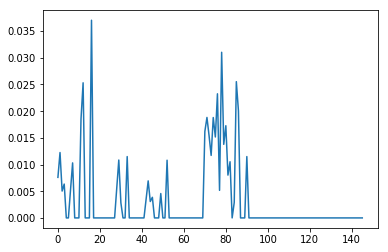

In [332]:
import matplotlib.pyplot as plt
plt.plot(a["a"], a["c"])

In [327]:
sorted(list(zip(lgbm_clf.feature_importances_,testLe.drop(['redemption_status', 'id', 'customer_id', 'campaign_id','item_price',
                    'start_date_weekDay','active_days_num'], 
                                                                        axis = 1).columns)), key=lambda x:x[0])

[(0.0, 'category_Garden'),
 (0.0, 'category_Restauarant'),
 (0.0, 'category_Salads'),
 (0.0, 'category_Travel'),
 (0.0, 'category_Vegetables (cut)'),
 (1.5248899459838867, 'category_Flowers & Plants'),
 (15.445119976997375, 'category_Bakery'),
 (16.58796989917755, 'category_Skin & Hair Care'),
 (18.440377950668335, 'end_date_year'),
 (24.450929880142212, 'end_date_weekDay'),
 (30.051219820976257, 'category_Miscellaneous'),
 (38.39865016937256, 'bothBrandType'),
 (48.78253984451294, 'no_of_adults_freq'),
 (49.81184995174408, 'start_date_year'),
 (50.81503093242645, 'category_Meat'),
 (82.43435437977314, 'num_categories'),
 (90.60926079750061, 'category_Dairy, Juices & Snacks'),
 (126.8984307050705, 'category_Seafood'),
 (150.59978985786438, 'category_Prepared Food'),
 (181.9543513059616, 'marital_status_le'),
 (195.21339082717896, 'no_of_children_le'),
 (218.26187920570374, 'no_of_children_null'),
 (234.27629137039185, 'no_of_adults'),
 (236.07773000001907, 'rented'),
 (284.840662717819

In [334]:
mergedDataFullOneHot = pd.read_csv('mergedDataFullOneHot.csv')

In [335]:
mergedDataFullOneHot.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,active_days_num,start_date_day,start_date_month,start_date_year,start_date_weekDay,start_date_week,end_date_day,end_date_month,end_date_year,end_date_weekDay,end_date_week,brand_type_Established,brand_type_Local,category_Bakery,"category_Dairy, Juices & Snacks",category_Flowers & Plants,category_Garden,category_Grocery,category_Meat,category_Miscellaneous,category_Natural Products,category_Packaged Meat,category_Pharmaceutical,category_Prepared Food,category_Restauarant,category_Salads,category_Seafood,category_Skin & Hair Care,category_Travel,category_Vegetables (cut),item_price,brand,coupon_item_count,num_categories,tot_item_id,tot_quantity,avg_item_price,tot_item_id_coupon,tot_quantity_coupon,avg_item_price_coupon,rented,income_bracket,marital_status_null,no_of_children_null,no_of_adults,last_active_interval,customer_demographic_null,campaign_type_X,campaign_type_Y,age_range_18-25,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+,marital_status_Married,marital_status_Single,family_size_1,family_size_2,family_size_3,family_size_4,family_size_5+,no_of_children_0,no_of_children_1,no_of_children_2,no_of_children_3
0,1,13,27,1053,$0.00,47,19,5,2013,6,20,5,7,2013,4,27,$125.00,$0.00,0,$0.00,$0.00,0,$125.00,$0.00,0,$0.00,$0.00,$0.00,0,0,0,$0.00,$0.00,0,0,$118.41,$2.00,125,1,72682,208,$155.70,94,124,$164.22,$0.00,$5.00,$1.00,$1.00,$1.00,70,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
1,2,13,116,48,$0.00,47,19,5,2013,6,20,5,7,2013,4,27,$0.00,$3.00,0,$0.00,$0.00,0,$3.00,$0.00,0,$0.00,$0.00,$0.00,0,0,0,$0.00,$0.00,0,0,$70.89,$1.00,3,1,12061,332,$196.00,178,237,$115.65,$0.00,$3.00,$0.00,$1.00,$2.00,71,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,6,9,635,205,$0.00,32,11,3,2013,0,11,12,4,2013,4,15,$67.00,$0.00,0,$0.00,$0.00,0,$0.00,$0.00,0,$0.00,$0.00,$67.00,0,0,0,$0.00,$0.00,0,0,$345.10,$1.00,67,1,1098,769,$111.78,510,746,$117.70,$0.00,$7.00,$0.00,$1.00,$2.00,7,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
3,7,13,644,1050,$0.00,47,19,5,2013,6,20,5,7,2013,4,27,$4.00,$0.00,0,$0.00,$0.00,0,$4.00,$0.00,0,$0.00,$0.00,$0.00,0,0,0,$0.00,$0.00,0,0,$93.15,$1.00,4,1,269,210,$99.32,109,151,$105.57,$0.00,$5.00,$1.00,$1.00,$2.00,81,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
4,9,8,1017,1489,$0.00,48,16,2,2013,5,7,5,4,2013,4,14,$32.00,$0.00,0,$0.00,$0.00,0,$32.00,$0.00,0,$0.00,$0.00,$0.00,0,0,0,$0.00,$0.00,0,0,$201.15,$1.00,32,1,124096,430,$86.86,225,391,$82.03,$0.00,$3.00,$0.00,$1.00,$2.00,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0


In [338]:
trainOneHot = mergedDataFullOneHot.iloc[:trainData.shape[0],:]
testOneHot = mergedDataFullOneHot.iloc[trainData.shape[0]:,:]

In [339]:
testOneHot.shape, mergedDataFullOneHot.shape, trainOneHot.shape

((50226, 71), (128595, 71), (78369, 71))

In [344]:
trainOneHot.tail()

,id,campaign_id,coupon_id,customer_id,redemption_status,active_days_num,start_date_day,start_date_month,start_date_year,start_date_weekDay,start_date_week,end_date_day,end_date_month,end_date_year,end_date_weekDay,end_date_week,brand_type_Established,brand_type_Local,category_Bakery,"category_Dairy, Juices & Snacks",category_Flowers & Plants,category_Garden,category_Grocery,category_Meat,category_Miscellaneous,category_Natural Products,category_Packaged Meat,category_Pharmaceutical,category_Prepared Food,category_Restauarant,category_Salads,category_Seafood,category_Skin & Hair Care,category_Travel,category_Vegetables (cut),item_price,brand,coupon_item_count,num_categories,tot_item_id,tot_quantity,avg_item_price,tot_item_id_coupon,tot_quantity_coupon,avg_item_price_coupon,rented,income_bracket,marital_status_null,no_of_children_null,no_of_adults,last_active_interval,customer_demographic_null,campaign_type_X,campaign_type_Y,age_range_18-25,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+,marital_status_Married,marital_status_Single,family_size_1,family_size_2,family_size_3,family_size_4,family_size_5+,no_of_children_0,no_of_children_1,no_of_children_2,no_of_children_3
78364,128587,8,71,1523,0.00,48,16,2,2013,5,7,5,4,2013,4,14,0.00,4.00,0,0.00,0.00,0,4.00,0.00,0,0.00,0.00,0.00,0,0,0,0.00,0.00,0,0,68.24,1.00,4,1,386,368,119.46,147,152,138.44,0.00,1.00,0.00,1.00,2.00,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0
78365,128589,30,547,937,0.00,46,19,11,2012,0,47,4,1,2013,4,1,7.00,0.00,0,0.00,0.00,0,7.00,0.00,0,0.00,0.00,0.00,0,0,0,0.00,0.00,0,0,244.03,3.00,7,1,243,206,96.73,144,171,103.36,0.00,2.00,0.00,1.00,2.00,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0
78366,128590,8,754,1004,0.00,48,16,2,2013,5,7,5,4,2013,4,14,83.00,0.00,0,0.00,0.00,0,83.00,0.00,0,0.00,0.00,0.00,0,0,0,0.00,0.00,0,0,189.21,1.00,83,1,144781,919,101.71,495,610,114.58,0.00,5.00,1.00,1.00,2.00,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
78367,128592,13,134,71,0.00,47,19,5,2013,6,20,5,7,2013,4,27,0.00,7.00,0,0.00,0.00,0,7.00,0.00,0,0.00,0.00,0.00,0,0,0,0.00,0.00,0,0,30.43,2.00,7,1,17703,757,85.10,481,667,92.92,0.00,4.00,0.00,0.00,2.00,70,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
78368,128595,13,681,623,0.00,47,19,5,2013,6,20,5,7,2013,4,27,30.00,0.00,0,0.00,0.00,0,30.00,0.00,0,0.00,0.00,0.00,0,0,0,0.00,0.00,0,0,169.80,1.00,30,1,224621,534,106.27,300,353,113.23,0.00,5.00,1.00,1.00,2.00,70,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0


In [345]:
partialTrainDataOH = trainOneHot[~trainOneHot['campaign_id'].isin([9,10,11,12,13])]
partialValidateDataOH = trainOneHot[trainOneHot['campaign_id'].isin([9,10,11,12,13])]

In [353]:
import lightgbm
from sklearn.preprocessing import RobustScaler
rbsFull = RobustScaler()
"""params = {'min_data_in_leaf': 200, 'learning_rate': 0.007059, #'metric': 'binary_logloss', "feature_fraction":0.8,
 #'subsample': 0.9920028820065904, 'bagging_freq': 11, 'importance_type': 'gain', "bagging_fraction": 0.8, "lambda": 0.1,
 'min_sum_hessian_in_leaf': 20, #'verbose': 1, 'boost_from_average': False,
 #'colsample_bytree': 0.13358144268185645, 'objective': 'binary', 
 'max_depth': 2, 'num_leaves': 10, 'verbose_eval': True}"""

params = {'min_data_in_leaf': 35, 'learning_rate': 0.02705919212825226, 'metric': 'binary_logloss', "feature_fraction":0.8,
 'subsample': 0.9920028820065904, 'bagging_freq': 11, 'importance_type': 'gain', "bagging_fraction": 0.8, "lambda": 0.1,
 'min_sum_hessian_in_leaf': 1, 'verbose': 1, 'boost_from_average': False,
 'colsample_bytree': 0.13358144268185645, 'objective': 'binary', 
 'max_depth': 3, 'num_leaves': 17, 'verbose_eval': True}
lgbm_clf = lightgbm.LGBMClassifier(**params, n_estimators = 2000, nthread = 4, n_jobs = -1)
lgbm_clf.fit(rbsFull.fit_transform(trainOneHot.drop(['redemption_status', 'id', 'customer_id'
                                                         ], axis = 1)), trainOneHot['redemption_status'])
# roc_auc_score()
# roc_auc_score(partialValidateDataOH['redemption_status'],lgbm_clf.predict_proba(
#     rbsFull.transform(partialValidateDataOH.drop(['redemption_status', 'id', 'customer_id'],
#                                                axis = 1)))[:,1])

LGBMClassifier(bagging_fraction=0.8, bagging_freq=11, boost_from_average=False,
               boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.13358144268185645, feature_fraction=0.8,
               importance_type='gain', lambda=0.1,
               learning_rate=0.02705919212825226, max_depth=3,
               metric='binary_logloss', min_child_samples=20,
               min_child_weight=0.001, min_data_in_leaf=35, min_split_gain=0.0,
               min_sum_hessian_in_leaf=1, n_estimators=2000, n_jobs=-1,
               nthread=4, num_leaves=17, objective='binary', random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.9920028820065904, subsample_for_bin=200000,
               subsample_freq=0, verbose=1, ...)

In [356]:
preds = lgbm_clf.predict_proba(rbsFull.transform(testOneHot.drop(['redemption_status', 'id', 'customer_id'], axis = 1)))[:,1]
print(preds.sum())
testLe['redemption_status'] = preds
testLe[['id','redemption_status']].to_csv('SubmissionOHlgbm2.csv', index=False)

50.88219017927483


c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [374]:
trainLe['no_of_months_for_campaign'].value_counts()

2    55683
1    22686
Name: no_of_months_for_campaign, dtype: int64

In [606]:
mergedDataFullLe['no_of_months_for_campaign'] =  (mergedDataFullLe.end_date_month - mergedDataFullLe.start_date_month).apply(
    lambda x: 12 + x if x < 0 else x)

In [373]:
trainLe['no_of_months_for_campaign'] =  (trainLe.end_date_month - trainLe.start_date_month).apply(lambda x: 12 + x if x < 0 
                                                                                                  else x)

c:\users\sarthak.agarwal\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [613]:
a = trainLe.groupby(['customer_id']).agg({"campaign_id": pd.Series.nunique}).reset_index()
a.columns = ['customer_id', 'num_campaign_customer_id']
mergedDataFullLe = pd.merge(mergedDataFullLe, a, how = "inner", on = 'customer_id')

In [615]:
a = trainLe.groupby(['campaign_id']).agg({"coupon_id": pd.Series.nunique}).reset_index()
a.columns = ['campaign_id', 'num_campaign_coupon_id']
mergedDataFullLe = pd.merge(mergedDataFullLe, a, how = "inner", on = 'campaign_id')

In [618]:
a = trainLe.groupby(['campaign_id']).agg({"coupon_id":"count"}).reset_index()
a.columns = ['campaign_id', 'num_campaign_rows']
mergedDataFullLe = pd.merge(mergedDataFullLe, a, how = "inner", on = 'campaign_id')

In [385]:
a = trainLe.groupby(['campaign_id']).agg({"coupon_id":"count"}).reset_index()
a.columns = ['campaign_id', 'num_campaign_rows']
trainLe = pd.merge(trainLe, a, how = "inner", on = 'campaign_id')

In [390]:
trainLe.groupby(['brand_type']).agg({"redemption_status":["sum","mean","count"]})

KeyError: 'brand_type'

In [371]:
sum(trainLe['coupon_item_count'] != trainLe['coupon_item_count'])

0

In [350]:
sorted(list(zip(lgbm_clf.feature_importances_,testLe.drop(['redemption_status', 'id', 'customer_id', 'campaign_id','item_price',
                    'start_date_weekDay','active_days_num'], 
                                                                        axis = 1).columns)), key=lambda x:x[0])

[(0.0, 'category_Garden'),
 (0.0, 'category_Meat'),
 (0.0, 'category_Miscellaneous'),
 (0.0, 'category_Skin & Hair Care'),
 (0.0, 'category_Travel'),
 (0.0, 'coupon_item_count'),
 (0.0, 'num_categories'),
 (2.281860113143921, 'brand_type_Local'),
 (6.580731064081192, 'brand_type_Established'),
 (7.700919985771179, 'brand'),
 (13.444962461479008, 'tot_item_id_coupon'),
 (16.641120314598083, 'end_date_day'),
 (23.057419657707214, 'category_Pharmaceutical'),
 (30.25693714618683, 'category_Seafood'),
 (42.144189953804016, 'category_Packaged Meat'),
 (46.08703875541687, 'family_size_le'),
 (60.00163018703461, 'age_range_le_freq'),
 (61.623870491981506, 'income_bracket_freq'),
 (74.19730216264725, 'no_of_children_le'),
 (82.2890963703394, 'category_Grocery'),
 (88.36191540956497, 'active_days_num_freq'),
 (88.41686971485615, 'end_date_month'),
 (94.42344892024994, 'category_Vegetables (cut)'),
 (103.7390605211258, 'category_Bakery'),
 (103.78853353857994, 'end_date_week'),
 (126.072691470384

In [440]:
from lightgbm import plot_tree

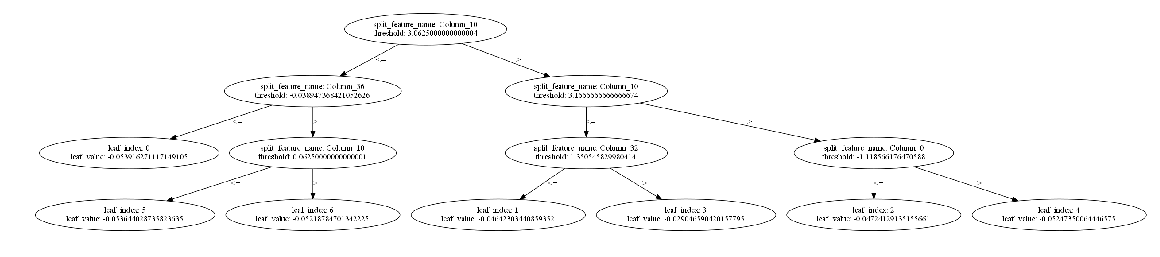

In [445]:
plot_tree(lgbm_clf, figsize=(20,12))

In [449]:
plot_tree?

In [459]:
len(testLe.drop(['redemption_status', 'id', 'customer_id', 'campaign_id','item_price',
                    'start_date_weekDay','active_days_num'], 
                                                                        axis = 1).columns)

57

In [462]:
[(i,j) for (i,j) in enumerate(testLe.drop(['redemption_status', 'id', 'customer_id', 'campaign_id','item_price',
                    'start_date_weekDay','active_days_num'], 
                                                                        axis = 1).columns)]

[(0, 'coupon_id'),
 (1, 'start_date_day'),
 (2, 'start_date_month'),
 (3, 'start_date_year'),
 (4, 'start_date_week'),
 (5, 'end_date_day'),
 (6, 'end_date_month'),
 (7, 'end_date_year'),
 (8, 'end_date_weekDay'),
 (9, 'end_date_week'),
 (10, 'brand_type_Established'),
 (11, 'brand_type_Local'),
 (12, 'category_Bakery'),
 (13, 'category_Dairy, Juices & Snacks'),
 (14, 'category_Flowers & Plants'),
 (15, 'category_Garden'),
 (16, 'category_Grocery'),
 (17, 'category_Meat'),
 (18, 'category_Miscellaneous'),
 (19, 'category_Natural Products'),
 (20, 'category_Packaged Meat'),
 (21, 'category_Pharmaceutical'),
 (22, 'category_Prepared Food'),
 (23, 'category_Restauarant'),
 (24, 'category_Salads'),
 (25, 'category_Seafood'),
 (26, 'category_Skin & Hair Care'),
 (27, 'category_Travel'),
 (28, 'category_Vegetables (cut)'),
 (29, 'brand'),
 (30, 'coupon_item_count'),
 (31, 'num_categories'),
 (32, 'tot_item_id'),
 (33, 'tot_quantity'),
 (34, 'avg_item_price'),
 (35, 'tot_item_id_coupon'),
 (3

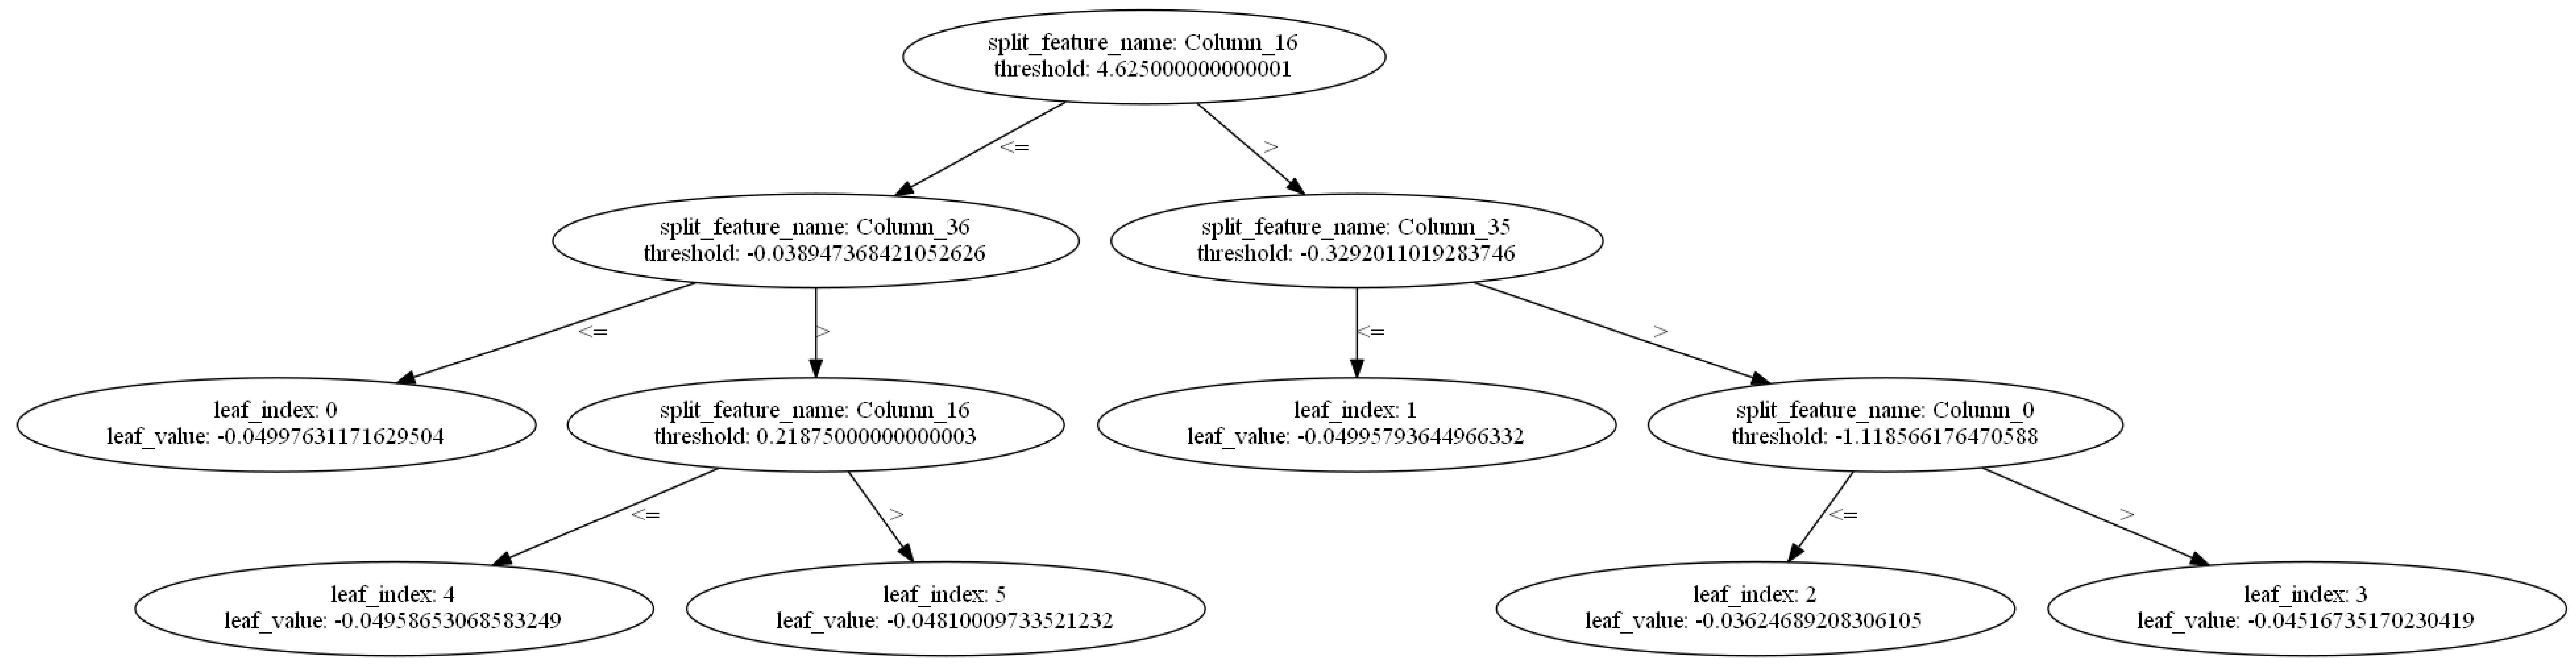

In [451]:
plot_tree(lgbm_clf, tree_index=3)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree2.png')

In [442]:
import os
os.environ["PATH"] += os.pathsep + 'D:/GraphViz/release/bin'

### Looking at the trees

In [614]:
partialTrainData = trainLe[~trainLe['campaign_id'].isin([9,10,11,12,13])]
partialValidateData = trainLe[trainLe['campaign_id'].isin([9,10,11,12,13])]
import lightgbm
from sklearn.preprocessing import RobustScaler
rbsFull = RobustScaler()
"""params = {'min_data_in_leaf': 200, 'learning_rate': 0.007059, #'metric': 'binary_logloss', "feature_fraction":0.8,
 #'subsample': 0.9920028820065904, 'bagging_freq': 11, 'importance_type': 'gain', "bagging_fraction": 0.8, "lambda": 0.1,
 'min_sum_hessian_in_leaf': 20, #'verbose': 1, 'boost_from_average': False,
 #'colsample_bytree': 0.13358144268185645, 'objective': 'binary', 
 'max_depth': 2, 'num_leaves': 10, 'verbose_eval': True}"""

params = {'min_data_in_leaf': 35, 'learning_rate': 0.02705919212825226, 'metric': 'binary_logloss', "feature_fraction":0.8,
 'subsample': 0.9920028820065904, 'bagging_freq': 11, 'importance_type': 'gain', "bagging_fraction": 0.8, "lambda": 0.1,
 'min_sum_hessian_in_leaf': 1, 'verbose': 1, 'boost_from_average': False,
 'colsample_bytree': 0.13358144268185645, 'objective': 'binary', 
 'max_depth': 3, 'num_leaves': 17, 'verbose_eval': True}
lgbm_clf = lightgbm.LGBMClassifier(**params, n_estimators = 2000, nthread = 4, n_jobs = -1)
lgbm_clf.fit(rbsFull.fit_transform(partialTrainData.drop(['redemption_status', 'id', 'customer_id', 'campaign_id','item_price',
                    'start_date_weekDay','active_days_num','age_range_le','category_Grocery','category_Salads','category_Skin & Hair Care',
                    
                    
                                                         ], axis = 1)), partialTrainData['redemption_status'])
# roc_auc_score()
roc_auc_score(partialValidateData['redemption_status'],lgbm_clf.predict_proba(
    rbsFull.transform(partialValidateData.drop(['redemption_status', 'id', 'customer_id','campaign_id', 'item_price',
                    'start_date_weekDay','active_days_num','age_range_le','category_Grocery','category_Salads','category_Skin & Hair Care',
                    
                    
                                               ],
                                               axis = 1)))[:,1])

0.8493425742543266

In [ ]:
# 0.8499651391811346 #0.8505044450478465 0.8506233474367713 0.8527331116743443

In [616]:
trainLe.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status', 'active_days_num', 'start_date_day', 'start_date_month', 'start_date_year', 'start_date_weekDay', 'start_date_week', 'end_date_day', 'end_date_month', 'end_date_year', 'end_date_weekDay', 'end_date_week', 'brand_type_Established', 'brand_type_Local', 'category_Bakery', 'category_Dairy, Juices & Snacks', 'category_Flowers & Plants', 'category_Garden', 'category_Grocery', 'category_Meat', 'category_Miscellaneous', 'category_Natural Products', 'category_Packaged Meat', 'category_Pharmaceutical', 'category_Prepared Food', 'category_Restauarant', 'category_Salads', 'category_Seafood', 'category_Skin & Hair Care', 'category_Travel', 'category_Vegetables (cut)', 'item_price', 'brand', 'coupon_item_count', 'num_categories', 'tot_item_id', 'tot_quantity', 'avg_item_price', 'tot_item_id_coupon', 'tot_quantity_coupon', 'avg_item_price_coupon', 'rented', 'income_bracket', 'marital_status_null', 'no_of_children_null', 'no_

In [619]:
mergedDataFullLe.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status', 'active_days_num', 'start_date_day', 'start_date_month', 'start_date_year', 'start_date_weekDay', 'start_date_week', 'end_date_day', 'end_date_month', 'end_date_year', 'end_date_weekDay', 'end_date_week', 'brand_type_Established', 'brand_type_Local', 'category_Bakery', 'category_Dairy, Juices & Snacks', 'category_Flowers & Plants', 'category_Garden', 'category_Grocery', 'category_Meat', 'category_Miscellaneous', 'category_Natural Products', 'category_Packaged Meat', 'category_Pharmaceutical', 'category_Prepared Food', 'category_Restauarant', 'category_Salads', 'category_Seafood', 'category_Skin & Hair Care', 'category_Travel', 'category_Vegetables (cut)', 'item_price', 'brand', 'coupon_item_count', 'num_categories', 'tot_item_id', 'tot_quantity', 'avg_item_price', 'tot_item_id_coupon', 'tot_quantity_coupon', 'avg_item_price_coupon', 'rented', 'income_bracket', 'marital_status_null', 'no_of_children_null', 'no_

In [ ]:
(12, 'category_Bakery'),
 (13, 'category_Dairy, Juices & Snacks'),
 (14, 'category_Flowers & Plants'),
 (15, 'category_Garden'),
 (16, 'category_Grocery'),
 (17, 'category_Meat'),
 (18, 'category_Miscellaneous'),
 (19, 'category_Natural Products'),
 (20, 'category_Packaged Meat'),
 (21, 'category_Pharmaceutical'),
 (22, 'category_Prepared Food'),
 (23, 'category_Restauarant'),
 (24, 'category_Salads'),
 (25, 'category_Seafood'),
 (26, 'category_Skin & Hair Care'),
 (27, 'category_Travel'),
 (28, 'category_Vegetables (cut)'),

### brandTypeEstablished mean freq

In [510]:
a['tot_item_id_coupon_mean'].mean()

0.007621758100131962

In [595]:
a = partialTrainData.groupby(['category_Pharmaceutical']).agg({"redemption_status": "mean"}).reset_index()
a.columns = ['category_Pharmaceutical','category_Pharmaceutical_mean']
trainLe = pd.merge(trainLe, a, how = "left", on = "category_Pharmaceutical")
trainLe['category_Pharmaceutical_mean'].fillna(a['category_Pharmaceutical_mean'].mean(), inplace=True)

In [ ]:
'category_Salads_mean', 'category_Skin & Hair Care_mean'

In [608]:
a = trainLe.groupby(['category_Skin & Hair Care']).agg({"redemption_status": "mean"}).reset_index()
a.columns = ['category_Skin & Hair Care','category_Skin & Hair Care_mean']
mergedDataFullLe = pd.merge(mergedDataFullLe, a, how = "left", on = "category_Skin & Hair Care")
mergedDataFullLe['category_Skin & Hair Care_mean'].fillna(a['category_Skin & Hair Care_mean'].mean(), inplace=True)

In [599]:
trainLe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 70 columns):
id                                 78369 non-null int64
campaign_id                        78369 non-null int64
coupon_id                          78369 non-null int64
customer_id                        78369 non-null int64
redemption_status                  78369 non-null float64
active_days_num                    78369 non-null int64
start_date_day                     78369 non-null int64
start_date_month                   78369 non-null int64
start_date_year                    78369 non-null int64
start_date_weekDay                 78369 non-null int64
start_date_week                    78369 non-null int64
end_date_day                       78369 non-null int64
end_date_month                     78369 non-null int64
end_date_year                      78369 non-null int64
end_date_weekDay                   78369 non-null int64
end_date_week                      78369 non-null

In [598]:
trainLe.drop(['category_Pharmaceutical_mean'], axis = 1, inplace=True)